# Histogram Matching
In the following project we will be trying to match histograms of two given photos by scaling histogram of RGB colors.

## Import required libraries
Import `numpy` and `matplotlib` libraries (placed in `requirements.txt` file).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Open images
Open source and reference images. Source image is the one which we want to match its histogram to reference image.

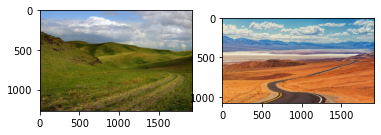

In [12]:
reference_img = mpimg.imread("Reference.jpg")
source_img = mpimg.imread("Source.jpg")

plt.subplot(1, 2, 1)
plt.imshow(reference_img)
plt.subplot(1, 2, 2)
plt.imshow(source_img)

## Extract RGB channels
Extract RGB channels for each image so we can run match histogram algorithm on each channel separately and merge all together.

In [242]:
reference_img_R = reference_img.copy()
reference_img_G = reference_img.copy()
reference_img_B = reference_img.copy()

reference_img_R[:, :, 1:3] = 0
reference_img_G[:, :, 0:3:2] = 0
reference_img_B[:, :, 0:2] = 0

source_img_R = source_img.copy()
source_img_G = source_img.copy()
source_img_B = source_img.copy()

source_img_R[:, :, 1:3] = 0
source_img_G[:, :, 0:3:2] = 0
source_img_B[:, :, 0:2] = 0

## Extract pixels' color
Extract color of each pixel for each channel and save it to the corresponding list.

In [243]:
reference_R_values = reference_img_R[:, :, 0:1].ravel()
source_R_values = source_img_R[:, :, 0:1].ravel()

reference_G_values = reference_img_G[:, :, 1:2].ravel()
source_G_values = source_img_G[:, :, 1:2].ravel()

reference_B_values = reference_img_B[:, :, 2:3].ravel()
source_B_values = source_img_B[:, :, 2:3].ravel()

## Compute matched values
Compute matched values by sorting the two given lists and map each of the source list's element to the corresponding element in the first list.

In [244]:
import random

def get_matched_values(source_values, reference_values):
    matched_values = []
    mapped_value = {}
    
    source_values_randomized = source_values.copy().astype('float')
    for i in range(len(source_values_randomized)):
        source_values_randomized[i] += random.random()
        
    source_values_randomized_sorted = sorted(source_values_randomized)
    
    reference_values_sorted = sorted(reference_values)
    for i in range(len(source_values_randomized)):
        index = math.floor(i * len(reference_values_sorted) / len(source_values_randomized_sorted))
        mapped_value[source_values_randomized_sorted[i]] = reference_values_sorted[index]
    
    for i in source_values_randomized:
        matched_values.append(mapped_value[i])
    return matched_values

In [245]:
matched_R_values = get_matched_values(source_R_values, reference_R_values)
matched_G_values = get_matched_values(source_G_values, reference_G_values)
matched_B_values = get_matched_values(source_B_values, reference_B_values)

## Make the final image
Make the final image by replacing old pixels' color with the new ones for each channel.

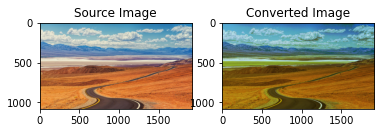

In [257]:
result_img = source_img.copy()
for i in range(result_img.shape[0]):
    for j in range(result_img.shape[1]):
        index = i * result_img.shape[1] + j
        result_img[i, j, 0] = matched_R_values[index]
        result_img[i, j, 1] = matched_G_values[index]
        result_img[i, j, 2] = matched_B_values[index]

source_plt = plt.subplot(1, 2, 1)
source_plt.title.set_text("Source Image")
plt.imshow(source_img)

dest_plt = plt.subplot(1, 2, 2)
dest_plt.title.set_text("Converted Image")
plt.imshow(result_img)

## Show histograms
To show that the converted image's histogram is matched to the reference one, we draw histogram for each channel of images.

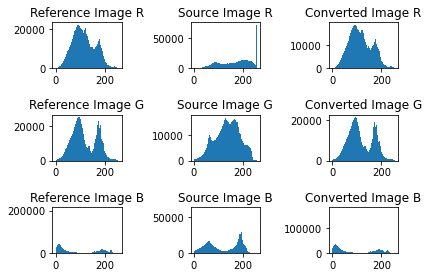

In [286]:
from matplotlib.pyplot import hist

fig, ax = plt.subplots(3, 3)

# R channel
ax[0, 0].title.set_text("Reference Image R")
ax[0, 0].hist(reference_R_values, bins=256)

ax[0, 1].title.set_text("Source Image R")
ax[0, 1].hist(source_R_values, bins=256)

ax[0, 2].title.set_text("Converted Image R")
ax[0, 2].hist(matched_R_values, bins=256)

# G channel
ax[1, 0].title.set_text("Reference Image G")
ax[1, 0].hist(reference_G_values, bins=256)

ax[1, 1].title.set_text("Source Image G")
ax[1, 1].hist(source_G_values, bins=256)

ax[1, 2].title.set_text("Converted Image G")
ax[1, 2].hist(matched_G_values, bins=256)

# B channel
ax[2, 0].title.set_text("Reference Image B")
ax[2, 0].hist(reference_B_values, bins=256)

ax[2, 1].title.set_text("Source Image B")
ax[2, 1].hist(source_B_values, bins=256)

ax[2, 2].title.set_text("Converted Image B")
ax[2, 2].hist(matched_B_values, bins=256)

plt.subplots_adjust(
    left=0.1,
    bottom=0.1, 
    right=0.9, 
    top=0.9, 
    wspace=1, 
    hspace=1
)
plt.show()